<a href="https://colab.research.google.com/github/elainerdangelo/agendamento-hospitalar/blob/main/Bootcamp_Datascience_Projeto01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Bootcamp Datascience Projeto 01**







Olá! Seja bem-vindo ao meu projeto do módulo 01 do Bootcamp de Datascience da Alura. Nele, farei uma análise quanto ao número de óbitos, despesas com internações e período de permanência comparando estados da **região norte** do Brasil. O objetivo é tentar identificar correlações desses dados com o período de enfrentamento da **Covid-19** no Brasil.

# **Análise inicial**

In [ ]:
#Importando dados e bibliotecas:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np


pd.options.display.float_format='{:.2f}'.format

gastos = pd.read_csv('/content/A003508189_28_143_208_Gastos.csv', encoding='ISO-8859-1', skiprows = 3, sep = ';', skipfooter=12,
                thousands='.', decimal=',')

mortes = pd.read_csv('/content/A220222189_28_143_208_Obitos.csv', encoding='ISO-8859-1', skiprows = 3, sep = ';', skipfooter=12,
                thousands='.', decimal=',')

internacoes = pd.read_csv('/content/A225537189_28_143_208_Internacoes.csv', encoding='ISO-8859-1', skiprows = 3, sep = ';', skipfooter=12,
                thousands='.', decimal=',')

media_permanencia = pd.read_csv('/content/A220528189_28_143_208_MediaPermanencia.csv', encoding='ISO-8859-1', skiprows = 3, sep = ';', skipfooter=12,
                thousands='.', decimal=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [ ]:
gastos.head()

,Unidade da Federação,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,246290737.10
1,12 Acre,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,86059009.46
2,13 Amazonas,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,468848592.60
3,14 Roraima,2527888.58,2587642.41,1923440.17,2422446.17,2495491.03,2851291.67,3137537.40,3788154.80,3217218.61,3113940.14,3157977.67,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,2928043.91,3090313.73,3621031.05,3454460.94,3266928.47,3519773.73,3985530.08,81960801.97
4,15 Pará,33849909.80,32871717.66,33130995.71,36044319.40,35906526.59,35242306.77,29460144.72,31179893.86,34175218.80,36122298.83,36874442.23,35947766.42,34365985.58,37417579.86,35610330.34,28292446.48,32998806.72,42192745.99,40804126.43,44385715.88,36820249.47,36965931.34,39004315.80,38015145.79,38354682.46,37688314.23,33276392.89,966998310.10


In [ ]:
mortes.head()

,Unidade da Federação,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,435,333,559,8823
1,12 Acre,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,3985
2,13 Amazonas,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1330,1616,1796,20619
3,14 Roraima,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,190,322,287,3893
4,15 Pará,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2218,1524,1762,1196,1019,1075,1068,1163,1230,1277,30196


In [ ]:
internacoes.head()

,Unidade da Federação,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,9708,9623,9899,10939,11252,10380,10646,10202,10244,10013,10283,9711,11116,9300,9552,7674,7530,6849,8353,8473,8907,8165,9058,8130,8065,6463,6431,246966
1,12 Acre,3284,2899,3797,3037,3658,4213,4402,4033,3889,4255,3632,3464,3782,4086,3743,2943,3104,3171,3479,3774,3454,4225,3612,3698,3915,3483,3969,99001
2,13 Amazonas,17444,15345,16796,16052,17051,15779,17043,16103,16964,16725,16206,15284,16411,15479,16265,13093,14317,14972,15054,14244,15290,15429,15085,13885,14517,17265,15855,423953
3,14 Roraima,3274,3086,2871,3172,3033,3591,4324,4881,4366,4288,4019,3767,3679,3775,3576,3132,2916,2846,2899,3263,3063,3481,3435,3496,3157,3304,3278,93972
4,15 Pará,38268,39379,40493,41863,42449,41512,37799,38526,41093,41973,41094,40501,39529,40926,39504,30762,29909,32102,33340,38719,36072,37057,38147,36941,36537,34126,27721,1016342


In [ ]:
media_permanencia.head()

,Unidade da Federação,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,5.20,4.60,4.90,4.50,4.60,4.40,5.20,4.90,4.80,5.10,4.90,4.60,4.60,4.50,4.90,5.00,4.70,5.00,5.00,4.80,4.40,4.20,4.70,4.40,5.20,5.00,5.50,4.80
1,12 Acre,4.80,4.90,5.20,5.10,5.30,4.60,4.40,4.80,4.80,4.60,4.80,5.20,5.40,5.10,5.00,4.90,4.70,4.60,5.10,4.60,4.50,4.70,4.40,4.70,4.60,5.50,5.40,4.90
2,13 Amazonas,5.10,5.20,5.20,5.30,5.30,5.20,5.20,5.20,5.20,4.90,5.10,5.10,5.30,5.20,5.10,5.40,5.30,5.50,5.30,5.40,5.50,5.10,5.60,5.10,5.40,5.50,5.80,5.30
3,14 Roraima,6.80,6.60,5.40,5.90,6.50,5.80,5.90,5.20,4.90,5.30,5.60,6.90,5.70,5.90,6.30,5.60,5.30,5.40,5.80,5.80,5.70,5.70,6.00,5.70,5.80,6.70,6.40,5.90
4,15 Pará,4.30,4.10,4.10,4.20,4.10,4.20,3.90,4.00,4.10,4.00,4.10,4.10,4.10,4.10,4.10,4.10,4.30,4.50,4.30,4.40,4.30,4.10,4.10,4.10,4.20,4.20,4.60,4.20


# **Exploração dos dados**

Para facilitar nossa análise, vamos assumir a coluna "Unidade da Federação" como nosso index.


In [ ]:
colunas_usaveis = []
colunas_usaveis.append(gastos.mean().index.tolist())
colunas_usaveis.append(internacoes.mean().index.tolist())
colunas_usaveis.append(media_permanencia.mean().index.tolist())
colunas_usaveis.append(mortes.mean().index.tolist())


In [ ]:
for i in range(0,3):
    colunas_usaveis[i].insert(0,'Unidade da Federação')
    
colunas_usaveis[3].insert(0,'Unidade da Federação')

In [ ]:
gastos2 = gastos[colunas_usaveis[0]]
internacoes2 = internacoes[colunas_usaveis[1]]
media_permanencia2 = media_permanencia[colunas_usaveis[2]]
mortes2 = mortes[colunas_usaveis[3]]

In [ ]:
gastos2.head()

,Unidade da Federação,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,246290737.10
1,12 Acre,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,86059009.46
2,13 Amazonas,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,468848592.60
3,14 Roraima,2527888.58,2587642.41,1923440.17,2422446.17,2495491.03,2851291.67,3137537.40,3788154.80,3217218.61,3113940.14,3157977.67,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,2928043.91,3090313.73,3621031.05,3454460.94,3266928.47,3519773.73,3985530.08,81960801.97
4,15 Pará,33849909.80,32871717.66,33130995.71,36044319.40,35906526.59,35242306.77,29460144.72,31179893.86,34175218.80,36122298.83,36874442.23,35947766.42,34365985.58,37417579.86,35610330.34,28292446.48,32998806.72,42192745.99,40804126.43,44385715.88,36820249.47,36965931.34,39004315.80,38015145.79,38354682.46,37688314.23,33276392.89,966998310.10


In [ ]:
mortes2.head()

,Unidade da Federação,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,435,333,559,8823
1,12 Acre,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,3985
2,13 Amazonas,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1330,1616,1796,20619
3,14 Roraima,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,190,322,287,3893
4,15 Pará,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2218,1524,1762,1196,1019,1075,1068,1163,1230,1277,30196


In [ ]:
internacoes2.head()

,Unidade da Federação,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,9708,9623,9899,10939,11252,10380,10646,10202,10244,10013,10283,9711,11116,9300,9552,7674,7530,6849,8353,8473,8907,8165,9058,8130,8065,6463,6431,246966
1,12 Acre,3284,2899,3797,3037,3658,4213,4402,4033,3889,4255,3632,3464,3782,4086,3743,2943,3104,3171,3479,3774,3454,4225,3612,3698,3915,3483,3969,99001
2,13 Amazonas,17444,15345,16796,16052,17051,15779,17043,16103,16964,16725,16206,15284,16411,15479,16265,13093,14317,14972,15054,14244,15290,15429,15085,13885,14517,17265,15855,423953
3,14 Roraima,3274,3086,2871,3172,3033,3591,4324,4881,4366,4288,4019,3767,3679,3775,3576,3132,2916,2846,2899,3263,3063,3481,3435,3496,3157,3304,3278,93972
4,15 Pará,38268,39379,40493,41863,42449,41512,37799,38526,41093,41973,41094,40501,39529,40926,39504,30762,29909,32102,33340,38719,36072,37057,38147,36941,36537,34126,27721,1016342


In [ ]:
media_permanencia2.head()

,Unidade da Federação,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,5.20,4.60,4.90,4.50,4.60,4.40,5.20,4.90,4.80,5.10,4.90,4.60,4.60,4.50,4.90,5.00,4.70,5.00,5.00,4.80,4.40,4.20,4.70,4.40,5.20,5.00,5.50,4.80
1,12 Acre,4.80,4.90,5.20,5.10,5.30,4.60,4.40,4.80,4.80,4.60,4.80,5.20,5.40,5.10,5.00,4.90,4.70,4.60,5.10,4.60,4.50,4.70,4.40,4.70,4.60,5.50,5.40,4.90
2,13 Amazonas,5.10,5.20,5.20,5.30,5.30,5.20,5.20,5.20,5.20,4.90,5.10,5.10,5.30,5.20,5.10,5.40,5.30,5.50,5.30,5.40,5.50,5.10,5.60,5.10,5.40,5.50,5.80,5.30
3,14 Roraima,6.80,6.60,5.40,5.90,6.50,5.80,5.90,5.20,4.90,5.30,5.60,6.90,5.70,5.90,6.30,5.60,5.30,5.40,5.80,5.80,5.70,5.70,6.00,5.70,5.80,6.70,6.40,5.90
4,15 Pará,4.30,4.10,4.10,4.20,4.10,4.20,3.90,4.00,4.10,4.00,4.10,4.10,4.10,4.10,4.10,4.10,4.30,4.50,4.30,4.40,4.30,4.10,4.10,4.10,4.20,4.20,4.60,4.20


Usamos a função mean para fazer um recorte somente das colunas que possuem valores.

In [ ]:
internacoes2 = internacoes2.set_index("Unidade da Federação")
media_permanencia2 = media_permanencia2.set_index("Unidade da Federação")
gastos2 = gastos2.set_index("Unidade da Federação")
mortes2 = mortes2.set_index("Unidade da Federação")

In [ ]:
gastos2.head()

,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,246290737.10
12 Acre,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,86059009.46
13 Amazonas,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,468848592.60
14 Roraima,2527888.58,2587642.41,1923440.17,2422446.17,2495491.03,2851291.67,3137537.40,3788154.80,3217218.61,3113940.14,3157977.67,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,2928043.91,3090313.73,3621031.05,3454460.94,3266928.47,3519773.73,3985530.08,81960801.97
15 Pará,33849909.80,32871717.66,33130995.71,36044319.40,35906526.59,35242306.77,29460144.72,31179893.86,34175218.80,36122298.83,36874442.23,35947766.42,34365985.58,37417579.86,35610330.34,28292446.48,32998806.72,42192745.99,40804126.43,44385715.88,36820249.47,36965931.34,39004315.80,38015145.79,38354682.46,37688314.23,33276392.89,966998310.10


In [ ]:
mortes2.head()

,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,435,333,559,8823
12 Acre,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,3985
13 Amazonas,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1330,1616,1796,20619
14 Roraima,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,190,322,287,3893
15 Pará,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2218,1524,1762,1196,1019,1075,1068,1163,1230,1277,30196


In [ ]:
media_permanencia2.head()

,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,5.20,4.60,4.90,4.50,4.60,4.40,5.20,4.90,4.80,5.10,4.90,4.60,4.60,4.50,4.90,5.00,4.70,5.00,5.00,4.80,4.40,4.20,4.70,4.40,5.20,5.00,5.50,4.80
12 Acre,4.80,4.90,5.20,5.10,5.30,4.60,4.40,4.80,4.80,4.60,4.80,5.20,5.40,5.10,5.00,4.90,4.70,4.60,5.10,4.60,4.50,4.70,4.40,4.70,4.60,5.50,5.40,4.90
13 Amazonas,5.10,5.20,5.20,5.30,5.30,5.20,5.20,5.20,5.20,4.90,5.10,5.10,5.30,5.20,5.10,5.40,5.30,5.50,5.30,5.40,5.50,5.10,5.60,5.10,5.40,5.50,5.80,5.30
14 Roraima,6.80,6.60,5.40,5.90,6.50,5.80,5.90,5.20,4.90,5.30,5.60,6.90,5.70,5.90,6.30,5.60,5.30,5.40,5.80,5.80,5.70,5.70,6.00,5.70,5.80,6.70,6.40,5.90
15 Pará,4.30,4.10,4.10,4.20,4.10,4.20,3.90,4.00,4.10,4.00,4.10,4.10,4.10,4.10,4.10,4.10,4.30,4.50,4.30,4.40,4.30,4.10,4.10,4.10,4.20,4.20,4.60,4.20


In [ ]:
internacoes2.head()

,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,9708,9623,9899,10939,11252,10380,10646,10202,10244,10013,10283,9711,11116,9300,9552,7674,7530,6849,8353,8473,8907,8165,9058,8130,8065,6463,6431,246966
12 Acre,3284,2899,3797,3037,3658,4213,4402,4033,3889,4255,3632,3464,3782,4086,3743,2943,3104,3171,3479,3774,3454,4225,3612,3698,3915,3483,3969,99001
13 Amazonas,17444,15345,16796,16052,17051,15779,17043,16103,16964,16725,16206,15284,16411,15479,16265,13093,14317,14972,15054,14244,15290,15429,15085,13885,14517,17265,15855,423953
14 Roraima,3274,3086,2871,3172,3033,3591,4324,4881,4366,4288,4019,3767,3679,3775,3576,3132,2916,2846,2899,3263,3063,3481,3435,3496,3157,3304,3278,93972
15 Pará,38268,39379,40493,41863,42449,41512,37799,38526,41093,41973,41094,40501,39529,40926,39504,30762,29909,32102,33340,38719,36072,37057,38147,36941,36537,34126,27721,1016342


--------------------------------------------------------

In [ ]:
#Ordenação das linhas pelo "Total" de forma Decrescente.
internacoes2 = internacoes2.sort_values('Total', ascending=False)
media_permanencia2 = media_permanencia2.sort_values('Total', ascending=False)
gastos2 = gastos2.sort_values('Total', ascending=False)
mortes2 = mortes2.sort_values('Total', ascending=False)


In [ ]:
#Drop da coluna "Total"
internacoes2 = internacoes2.drop('Total',axis=1)
media_permanencia2 = media_permanencia2.drop('Total',axis=1)
gastos2 = gastos2.drop('Total',axis=1)
mortes2 = mortes2.drop('Total',axis=1)

In [ ]:
#Função criada para selecionar o id referente às regiões do Brasil
def reg(x):

    indexes = x.index

    região = []

    for i in indexes:

        if i[0] == '1':

            região.append('Norte')

        if i[0] == '2':

            região.append('Nordeste')

        if i[0] == '3':

            região.append('Sudeste')

        if i[0] == '4':

            região.append('Sul')

        if i[0] == '5':

            região.append('Centro-Oeste')
            
    return região

gastos2['Região Geográfica'] = reg(gastos2)
media_permanencia2['Região Geográfica'] = reg(media_permanencia2)
internacoes2['Região Geográfica'] = reg(internacoes2)
mortes2['Região Geográfica'] = reg(mortes2)

In [ ]:
#Recorte com os estados da região Norte do Brasil
gastos_norte = gastos2[gastos2['Região Geográfica'] == 'Norte']

permanencia_norte = media_permanencia2[media_permanencia2['Região Geográfica'] == 'Norte']
internacao_norte = internacoes2[internacoes2['Região Geográfica'] == 'Norte']
mortes_norte = mortes2[mortes2['Região Geográfica'] == 'Norte']

In [ ]:
mortes_norte.head()

,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Região Geográfica
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15 Pará,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2218,1524,1762,1196,1019,1075,1068,1163,1230,1277,Norte
13 Amazonas,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1330,1616,1796,Norte
11 Rondônia,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,435,333,559,Norte
17 Tocantins,246,264,249,220,208,211,210,220,278,224,220,217,283,252,290,231,248,283,363,333,341,299,9,14,15,4,52,Norte
12 Acre,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,Norte


In [ ]:
gastos_norte

In [ ]:
permanencia_norte

In [ ]:
internacao_norte

# **Gráficos**

In [ ]:
#Drop da coluna 'Região Geográfica'
gastos_norte2 = gastos_norte.drop('Região Geográfica',axis=1)
mortes_norte2 = mortes_norte.drop('Região Geográfica',axis=1)
permanencia_norte2 = permanencia_norte.drop('Região Geográfica',axis=1)
internacao_norte2 = internacao_norte.drop('Região Geográfica',axis=1)


In [ ]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

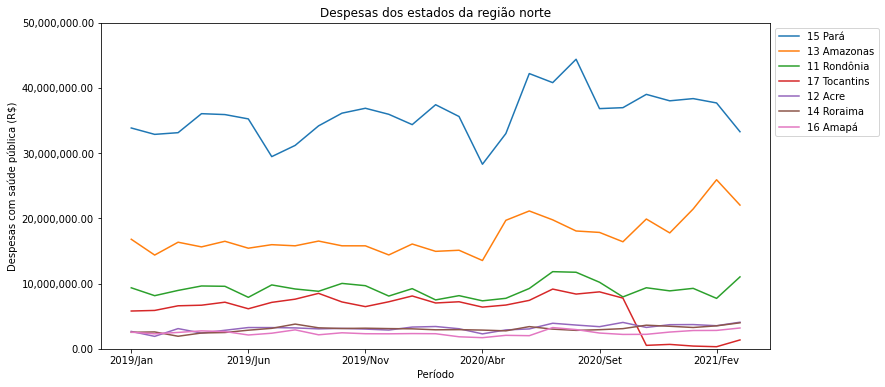

In [ ]:
ax = gastos_norte2.T.plot(figsize=(12,6))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.xlabel('Período')

plt.ylabel('Despesas com saúde pública (R$)')

plt.title('Despesas dos estados da região norte')

plt.ylim(0, 50000000)

plt.show()

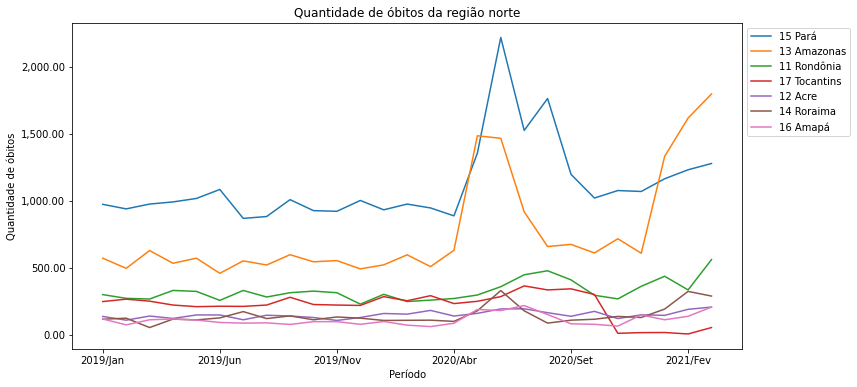

In [ ]:
ax2 = mortes_norte2.T.plot(figsize=(12,6))

ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.xlabel('Período')

plt.ylabel('Quantidade de óbitos')

plt.title('Quantidade de óbitos da região norte')

plt.show()

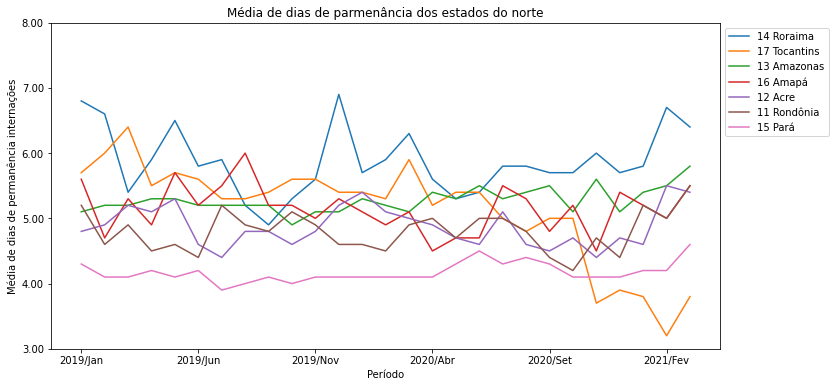

In [ ]:
ax3 = permanencia_norte2.T.plot(figsize=(12,6))

ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.xlabel('Período')

plt.ylabel('Média de dias de permanência internações')

plt.title('Média de dias de parmenância dos estados do norte')

plt.ylim(3, 8)

plt.show()

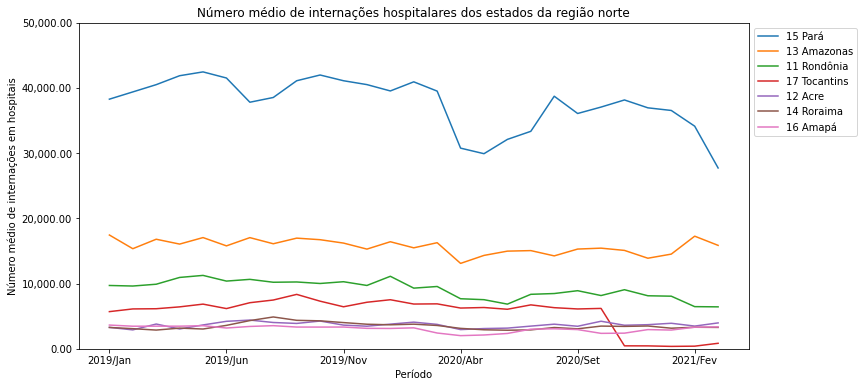

In [ ]:
ax4 = internacao_norte2.T.plot(figsize=(12,6))

ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.xlabel('Período')

plt.ylabel('Número médio de internações em hospitais')

plt.title('Número médio de internações hospitalares dos estados da região norte')

plt.ylim(0, 50000)

plt.show()

# **Observações**

**Despesas**: foi possível notar um salto referente à despesa após o período de Abril de 2020, principalmente nos estados do Pará e Amazonas. Assim como observamos uma queda nas despesas no período de Novembro a Dezembro de 2020. Isso faz sentido com a crise sanitária nesses estados, tanto que houve relaxamento das medidas restritivas no fim do ano de 2020.

**Óbitos**: nítidas elevações no número de mortes entre o período de Abril a Agosto de 2020, principalmente nos estados do Pará e Amazonas.

**Permanência Internação**: dados inconclusivos. Difícil determinar tendências. Seria necessário analisar um período histórico maior.

**Número de Internação**: dados inconclusivos. Difícil determinar tendências. Seria necessário analisar um período histórico maior.

